<a href="https://colab.research.google.com/github/macbhaldar/Data-Science-Python-Handbook/blob/main/Text-Mining-and-NLP/TextClassification_with_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification

In [1]:
import numpy as np
import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline

In [2]:
# Load the filenames and data from the 20 newsgroups dataset
twenty_train = fetch_20newsgroups(
    subset="train", shuffle=True, download_if_missing=True
)
twenty_test = fetch_20newsgroups(subset="test", shuffle=True, download_if_missing=True)

In [3]:
twenty_train.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [4]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f"Shape of Term Frequency Matrix: {X_train_counts.shape}")

Shape of Term Frequency Matrix: (11314, 130107)


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f"Shape of TFIDF Matrix: {X_train_tfidf.shape}")

Shape of TFIDF Matrix: (11314, 130107)


In [7]:
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [8]:
# Building a pipeline
text_nb_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB()),
    ]
)
text_nb_clf = text_nb_clf.fit(twenty_train.data, twenty_train.target)

In [9]:
predicted = text_nb_clf.predict(twenty_test.data)
naivebayes_clf_accuracy = np.mean(predicted == twenty_test.target) * 100.0

In [10]:
print(f"Test Accuracy is {naivebayes_clf_accuracy} %")

Test Accuracy is 77.38980350504514 %


In [11]:
# Using Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression as LR

In [12]:
%%time
text_lr_clf = Pipeline(
    [("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf", LR())]
)
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 1min 18s, sys: 32.1 s, total: 1min 50s
Wall time: 1min 11s


In [13]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100.0
print(f"Test Accuracy is {lr_clf_accuracy}")

Test Accuracy is 82.74030801911843


In [14]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

In [15]:
import json
print(json.dumps(cf.tolist(), indent=2))

[
  [
    237,
    2,
    0,
    0,
    1,
    1,
    4,
    0,
    3,
    3,
    0,
    1,
    2,
    8,
    2,
    33,
    2,
    4,
    1,
    15
  ],
  [
    1,
    307,
    14,
    8,
    8,
    17,
    6,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    4,
    2,
    1,
    1,
    2,
    1
  ],
  [
    2,
    21,
    289,
    34,
    12,
    11,
    2,
    2,
    2,
    4,
    0,
    1,
    1,
    1,
    3,
    2,
    0,
    0,
    6,
    1
  ],
  [
    0,
    13,
    23,
    284,
    21,
    2,
    14,
    3,
    0,
    1,
    1,
    1,
    24,
    0,
    3,
    0,
    1,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    22,
    319,
    1,
    10,
    0,
    0,
    5,
    1,
    0,
    12,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    43,
    38,
    5,
    4,
    292,
    3,
    0,
    0,
    0,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

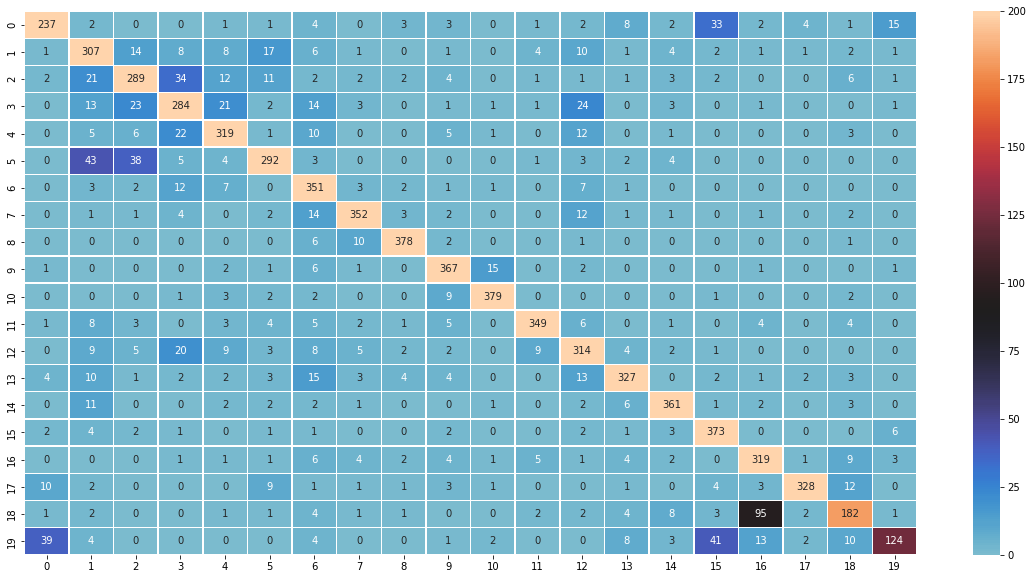

In [17]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(cf, annot=True, fmt="d", linewidths=0.5, center=90, vmax=200)

In [18]:
nlp = spacy.load("en_core_web_sm")

## Exploring spaCy

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [20]:
f'There are {len(STOP_WORDS)} stopwords in spaCy'

'There are 326 stopwords in spaCy'

In [21]:
# You can add your own corpora specific STOPWORDS using the .add syntax
STOP_WORDS.add("your_additional_stop_word_here")
f'After adding your own stop words, spaCy will use {len(STOP_WORDS)} stopwords'

'After adding your own stop words, spaCy will use 327 stopwords'

In [22]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using Python")
print(doc)  # doc is a spaCy object which stores the entire document string

I am learning the most important ideas Natural Language Processing ideas using Python


In [23]:
for token in doc:
    print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
Python


In [24]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc

[learning, important, ideas, Natural, Language, Processing, ideas, Python]

In [25]:
for token in simplified_doc:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos_}')

Token:learning	Lemmatized:learn	Part-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Part-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:Natural	Part-of-Speech-Tag:PROPN
Token:Language	Lemmatized:Language	Part-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:Processing	Part-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Python	Lemmatized:Python	Part-of-Speech-Tag:PROPN


## Integrating back with our classifier pipeline

In [26]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)
def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [27]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

CPU times: user 1min 18s, sys: 33 s, total: 1min 51s
Wall time: 1min 8s


In [28]:
def calc_print_accuracy(text_clf, test):
    predictions = text_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100.
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 82.74030801911843


82.74030801911843

In [29]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Accuracy is 79.5539033457249
CPU times: user 3min 6s, sys: 41.1 s, total: 3min 47s
Wall time: 2min 50s
